## I. Introduction
This dataset includes data from 100k medical appointments from Brazil. In the table, the dependent variable "no-show" seems to be correlated with data in other columns. Before deciding which questions to throw, let's skim through the data and get the gist of it.

In [7]:
# import dependent packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
table = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(f"rows: {table.shape[0]}  columns: {table.shape[1]}") # rows and columns
head = table.head(3)
head # see which columns(variables) are included in the table.

rows: 110527  columns: 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [9]:
# I dont like "ID" in Patent"Id" and Appointment"ID" being diffrernt.
# Also handcap looks like type. I'll also rename it "handicap"
table = table.rename(columns={"PatientId":"PatientID", "Handcap":"Handicap"})
table

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


The table includes many intriguing variables!!

Here's the list of questions I chose.
### I.1 Research Questions:
* Does the count of appointments correalted with no-show?
* Is the "location" of the hospital related to no-show?
* Does "no-show" affected by the time gap between scheduled day and appointment day?
* Does physical conditions such as hipertension, diabetes and handicap affects to "no-show"? How much?
* How much effecient is sending "SNS" to reduce "no-show" ?

## II. Data Wrangling

### II.1 General Properties
#### II.1.1 Dataset Integrity
Let's see if there's any missing information in the table.

In [10]:
print(table.isnull().any())

PatientID         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool


No Null data has been detected.

#### II.1.2 Analysing Variables
Let's recap the table's structure and summarize the data types and characteristics of each variables(columns)

In [11]:
head

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No



|No|Variable| Numeric vs Categorical|
|:--|:----------|:----------|
|01|**PatientID**| discrete integer(?), repeated(?)|
|02|AppointmentID| discrete integer, unique(?)|
|03|Gender| Categorical (binary? string)|
|04|**ScheduledDay**| continuous datetype|
|05|**AppointmentDay**| discrete(?) datetype|
|06|Age| discrete integer.|
|07|**Neighbourhood**| categorical, string.|
|08|Scholarship| Categorical (binary) boolean.|
|09|**Hipertension**| Categorical (binary) boolean.|
|10|**Diabetes**| Categorical (binary) boolean.|
|11|**Alcoholism**| Categorical (binary) boolean.|
|12|**Handicap**| Categorical (binary) boolean.|
|13|**SMS_received**| Categorical (binary) boolean.|
|14|**No-show**| Categorical (binary) string.|

Set the data clensing stretagy based on this table.

### II.2 Data Cleaning

**These are the my questions.**
* Q1: Does the count of appointments correalted with no-show ratio?
* Q2. Is the "location" of the hospital related to no-show?
* Q3. Does "no-show" related with the time gap between scheduled day and appointment day?
* Q4. Does physical conditions such as hipertension, diabetes and handicap is correlated with "no-show"? How much?
* Q5. How much effecient is sending "SMS" to reduce "no-show" ?

**And my data cleaning strategy for each questions is as follow.**
* for Q1-5: **Booleanize No-show**: "Yes/No" -> "0/1". {0:didn't come. 1:came}
* for Q1-5: **remove unnecessary colums** to answer each questions.
* for Q1: **NEW TABLE** with colum: Appointment count, show_rate
* for Q2: "Neighborhood" -> **ONE HOT ENCODE** before analisys
* for Q3: "ScheduledDay", "AppointmentDay" -> **NEW COLUMN** Scheduled_Before_X_Days:AppointmentDay-ScheduledDay

#### II.2.1 Booleanize No-show

In [12]:
table['Show'] = table['No-show'].replace("Yes", 0).replace("No", 1) # Add Show column filled with booleanized data.
table = table.drop(['No-show'], axis=1) #Remove 'No-Show' column

# table['No-show']=table['No-show']=='Yes' # this also works but with True/False not 1/0

In [13]:
table.iloc[:10, [1,13]] #Check

,AppointmentID,Show
0,5642903,1
1,5642503,1
2,5642549,1
3,5642828,1
4,5642494,1
5,5626772,1
6,5630279,0
7,5630575,0
8,5638447,1
9,5629123,1


#### II.2.2 For Q1. **NEW TABLE** with colum: Appointment count, show_rate

##### II.2.2.1 Appointment count
let's refine PatientId into Appointment_count 

             Appointment_counts
PatientID                      
188964456.0                   3
211124677.0                   2
215778678.0                   1
223798575.0                   2
226438321.0                   1 

Total Patients: 62299
max appointments: 88


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fdbfa1f28>]], dtype=object)

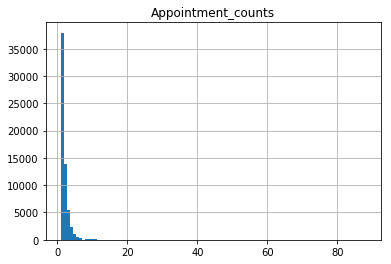

In [14]:
grouped = table[["PatientID","AppointmentID"]].groupby("PatientID")

Appointment_counts = grouped.count().rename(columns={"AppointmentID":"Appointment_counts"})

#see how the talbe looks
print(Appointment_counts.iloc[25:30], "\n")

#see important attributes
print("Total Patients:",len(Appointment_counts))
print("max appointments:", Appointment_counts.max().values[0])

#see histogram of appointment_counts
Appointment_counts.hist(bins=100)

Histogram's resolution is not good enough to make decision. 
Let's see the same data in raw-form

In [15]:
Appointment_counts_Series = table['PatientID'].value_counts()
Appointment_counts_Series.value_counts().iloc[:30]

1     37920
2     13895
3      5500
4      2367
5      1119
6       553
7       306
8       202
9       104
10       85
11       63
12       36
13       35
14       22
15       15
17       10
16       10
20        8
18        8
19        6
62        4
21        3
23        2
30        2
46        2
38        2
42        2
34        2
57        1
35        1
Name: PatientID, dtype: int64

most people made less than 5 appointments. It's be better to scale down by applying logarithm.

In [16]:
Appointment_count_log2 = np.log2(Appointment_counts).rename(columns={"Appointment_counts":"Appointment_counts_log2"})
Appointment_count_log2.iloc[30:35]

,Appointment_counts_log2
PatientID,
243921212.0,0.0
251541539.0,2.0
253866521.0,0.0
264963387.0,0.0
269919126.0,1.0


Now we're done with reservation_counts

##### II.2.2.2 show_ratio
This time, let's refine "show" into "show_ratio_by_patient"

In [17]:
grouped_2 = table[["PatientID","Show"]].groupby("PatientID")
show_sum = grouped_2.sum().rename(columns={"Show":"show_sum"})

show_sum["show_sum"]
show_ratio = show_sum["show_sum"] / Appointment_counts["Appointment_counts"]
show_ratio = pd.DataFrame(show_ratio, columns={"show_ratio"})
show_ratio.iloc[25:35,]
# grouped_2.sum()/grouped_2.count()

,show_ratio
PatientID,
188964456.0,1.00
211124677.0,1.00
215778678.0,0.00
223798575.0,1.00
226438321.0,1.00
243921212.0,1.00
251541539.0,0.75
253866521.0,1.00
264963387.0,1.00


In [18]:
# logged_count.join(grouped_ratio, lsuffix="_LgCount", rsuffix="_ratio").iloc[30:40].rename(columns={'Show':'show_ratio'})

table_q1 = Appointment_count_log2.join(show_ratio)
table_q1.iloc[30:40]

,Appointment_counts_log2,show_ratio
PatientID,,
243921212.0,0.0,1.00
251541539.0,2.0,0.75
253866521.0,0.0,1.00
264963387.0,0.0,1.00
269919126.0,1.0,1.00
274297149.0,0.0,1.00
318339487.0,0.0,1.00
318385314.0,0.0,1.00
319947764.0,0.0,1.00


Now we made the table required to answser Q1.
Let's move on to the data required to answer Q2.

#### II.2.3 for Q2: "Neighbourhood" -> ONE HOT ENCODE before analisys

According to the data provider:
> ‘Neighborhood’ indicates the location of the hospital.

Let's see how many locations are there and set strategy to clean up the data.

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

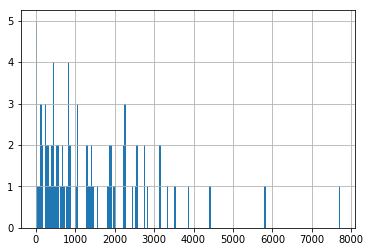

In [19]:
locations_count =  table["Neighbourhood"].value_counts()
print(locations_count)
locations_count.hist(bins=200)

Well, there's too much locations than I thought it would be.
I thought 5~10 at first look. and That's why I decided to "One-Hot-Encode".
In this case, dealing the location info as categorical data wouldn't be easy to visualize.

Also, It seems the "visit count difference among locations" can be alternative varible to inspect.

So I changed my mind to inspect correlataoin between "visit count difference among locations" and "show_ratio" instead of "locations" and "show"

In [20]:
grouped_3 = table[["Neighbourhood","Show"]].groupby("Neighbourhood")
count_by_location = grouped_3.count().rename(columns={"Show":"count_by_location"})
#although it would be proper to count using pk(AppointmentID), counting 'show' column has no differnce.
print(count_by_location)

show_ratio_by_location = (grouped_3.sum()/grouped_3.count()).rename(columns={"Show":"show_ratio"})
print(show_ratio_by_location)

                     count_by_location
Neighbourhood                         
AEROPORTO                            8
ANDORINHAS                        2262
ANTÔNIO HONÓRIO                    271
ARIOVALDO FAVALESSA                282
BARRO VERMELHO                     423
BELA VISTA                        1907
BENTO FERREIRA                     858
BOA VISTA                          312
BONFIM                            2773
CARATOÍRA                         2565
CENTRO                            3334
COMDUSA                            310
CONQUISTA                          849
CONSOLAÇÃO                        1376
CRUZAMENTO                        1398
DA PENHA                          2217
DE LOURDES                         305
DO CABRAL                          560
DO MOSCOSO                         413
DO QUADRO                          849
ENSEADA DO SUÁ                     235
ESTRELINHA                         538
FONTE GRANDE                       682
FORTE SÃO JOÃO           

In [21]:
table_q2 = count_by_location.join(show_ratio_by_location)
table_q2.index = table_q2.index.rename("location")
table_q2.iloc[30:40]

,count_by_location,show_ratio
location,,
ILHA DE SANTA MARIA,1885,0.808488
ILHA DO BOI,35,0.914286
ILHA DO FRADE,10,0.800000
ILHA DO PRÍNCIPE,2266,0.765225
ILHAS OCEÂNICAS DE TRINDADE,2,0.000000
INHANGUETÁ,1057,0.808893
ITARARÉ,3514,0.737336
JABOUR,2509,0.820247
JARDIM CAMBURI,7717,0.810159


#### II.2.4 Clean data For Q3. Does "no-show" affected by the time gap between scheduled day and appointment day?

This one will be easy to clean. No Categorization or one-hot-encoding.
Simeple time subtraction operation and typecasting will be enough to prepare table 

In [22]:
from datetime import datetime

time_gaps = []
for i,j in zip(table.AppointmentDay[:], table.ScheduledDay[:]):
    time_gap = datetime.strptime(i[:10],"%Y-%m-%d") - datetime.strptime(j[:10],"%Y-%m-%d")
    time_gaps.append(time_gap.days)
time_gaps[:10]

[0, 0, 0, 0, 0, 2, 2, 2, 0, 2]

In [23]:
table['time_gaps'] = time_gaps

In [24]:
table_q3 = table[['time_gaps','Show']]
table_q3[:20]

,time_gaps,Show
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,2,1
6,2,0
7,2,0
8,0,1
9,2,1


#### II.2.5 Clean data For Q4 and Q5.

* Q4: Does physical conditions such as hipertension, diabetes and handicap affects to "no-show"? How much?
* Q5: How much effecient is sending "SMS" to reduce "no-show" ?

Independent varibles required to answer these two questions are provided in ready-to-use state.

Select proper columns to each question.

In [25]:
table_q4 = table[['Hipertension','Diabetes','Handicap','Show']]
table_q4[:10]

,Hipertension,Diabetes,Handicap,Show
0,1,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,1,0,1
5,1,0,0,1
6,0,0,0,0
7,0,0,0,0
8,0,0,0,1
9,0,0,0,1


In [26]:
table_q5 = table[["SMS_received", "Show"]]
table_q5[10:20]

,SMS_received,Show
10,0,1
11,1,0
12,0,1
13,0,1
14,0,1
15,1,1
16,0,1
17,0,0
18,1,1
19,0,1


## EDA(Explanatory Data Analysis)

Now that we finished data cleaning. Let's take a deeper look into the data.

### Question1
* Q1: Does the count of appointments correalted with no-show ratio?

In [27]:
table_q1.describe()

,Appointment_counts_log2,show_ratio
count,62299.000000,62299.000000
mean,0.552672,0.803570
std,0.781690,0.351419
min,0.000000,0.000000
25%,0.000000,0.666667
50%,0.000000,1.000000
75%,1.000000,1.000000
max,6.459432,1.000000


In [28]:
table_q1.corr()

,Appointment_counts_log2,show_ratio
Appointment_counts_log2,1.000000,-0.030052
show_ratio,-0.030052,1.000000


There's small negative correlation between Appointment_counts_log2 and show_ratio.
It implies People who make many appointments is little more likely to not show up.

Maybe we can take a deeper look by categorizing people into several groups and visualizing it.

PatientID
9.861628e+14    1.000000
1.598237e+13    1.000000
2.375498e+13    1.000000
2.642797e+13    1.000000
2.681585e+13    1.000000
2.688613e+13    1.000000
2.723732e+13    1.000000
2.745236e+13    1.000000
3.353478e+13    1.000000
4.477218e+13    1.000000
4.572267e+13    1.000000
5.632270e+13    1.000000
5.729433e+13    1.000000
5.932374e+13    1.000000
6.919555e+13    1.000000
6.932219e+13    1.000000
8.313765e+13    1.000000
8.578414e+13    1.000000
9.555374e+13    1.000000
2.154446e+13    1.000000
9.646946e+12    1.000000
2.336589e+14    1.000000
9.349361e+12    1.000000
7.611824e+09    1.000000
8.435224e+09    1.000000
9.943729e+09    1.000000
1.651587e+10    1.000000
5.323769e+10    1.000000
5.615440e+10    1.000000
2.378539e+11    1.000000
                  ...   
7.316670e+13    0.545455
5.924925e+14    0.545455
7.132489e+13    0.545455
8.467847e+11    0.538462
6.529696e+12    0.538462
1.554213e+14    0.538462
2.483837e+11    0.533333
1.198157e+12    0.478261
5.142494e+11   

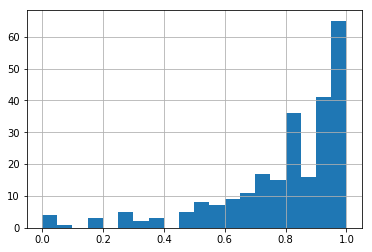

In [29]:
# Filter Out People with Less than 10 appointments.
filtered_tq1 = table_q1[table_q1["Appointment_counts_log2"]>3.45]["show_ratio"] #np.log2(11) -> 3.46

#Show Distribution of Patients in different show_rate interval.
sorted_ftq1 = filtered_tq1.sort_values(ascending=False)
print(sorted_ftq1)
sorted_ftq1.hist(bins=20)

g1 count:37920   average show_rate: 0.812
g2 count:19395   average show_rate: 0.792
g3 count:4345    average show_rate: 0.780
g4 count:562     average show_rate: 0.777
g5 count:52      average show_rate: 0.793
g6 count:25      average show_rate: 0.958


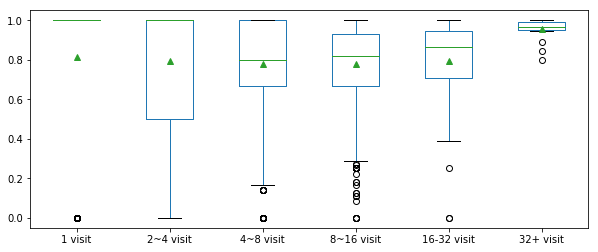

In [30]:
#log2에대하여 0,1,2,3,4,5+ 4개 구간으로 나누어서 플로팅. (박스차트)
g1 = table_q1[table_q1["Appointment_counts_log2"]==0]["show_ratio"].rename("1 visit")
g2 = table_q1[(table_q1["Appointment_counts_log2"]>=1)&(table_q1["Appointment_counts_log2"]<2)]["show_ratio"].rename("2~4 visit")
g3 = table_q1[(table_q1["Appointment_counts_log2"]>=2)&(table_q1["Appointment_counts_log2"]<3)]["show_ratio"].rename("4~8 visit")
g4 = table_q1[(table_q1["Appointment_counts_log2"]>=3)&(table_q1["Appointment_counts_log2"]<4)]["show_ratio"].rename("8~16 visit")
g5 = table_q1[(table_q1["Appointment_counts_log2"]>=4)&(table_q1["Appointment_counts_log2"]<5)]["show_ratio"].rename("16-32 visit")
g6 = table_q1[(table_q1["Appointment_counts_log2"]>=5)]["show_ratio"].rename("32+ visit")

groups = [g1,g2,g3,g4,g5,g6]
for i,g in zip(range(1,7),groups):
    print(f"g{i} count:{len(g): <5}   average show_rate: {g.mean():.3f}")
log2_grouped = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
log2_grouped.plot(kind="box", showmeans=True, figsize=(10,4)) #circles are outliers.

The average show_rate(green triangle) continuously decrease from g1 to g4 and recorded lowest at g4.
Then the show_rate continuously increased along with the appointment counts.

It is noticible that patients who made 4~16 appointments (group3 and group4) recorded lowest avaerage show_rate.
highest showup rate was found in g6 with exceptionally high value of 0.958.

As the number of patients in g5 and g6 is quite small, the impact of the outliers should also be counted when interpreting the result. (see the 75% percentile difference along with the values of outliers(small circles))

### Question2

* Q2. Is the "location" of the hospital related to no-show?

Before we answer the question, let's see which locations ranked on the top spot.

location
MÁRIO CYPRESTE         0.854447
SOLON BORGES           0.852878
DE LOURDES             0.845902
DO CABRAL              0.842857
SANTA MARTHA           0.841584
JARDIM DA PENHA        0.837245
DO QUADRO              0.835100
VILA RUBIM             0.834313
MATA DA PRAIA          0.829193
REPÚBLICA              0.828743
CONSOLAÇÃO             0.827762
SANTO ANTÔNIO          0.823744
REDENÇÃO               0.822923
NOVA PALESTINA         0.822438
JABOUR                 0.820247
SANTA LUÍZA            0.820093
COMDUSA                0.819355
JOANA D´ARC            0.819201
TABUAZEIRO             0.817050
FORTE SÃO JOÃO         0.816834
PRAIA DO CANTO         0.816425
ANTÔNIO HONÓRIO        0.815498
BOA VISTA              0.814103
FRADINHOS              0.813953
CONQUISTA              0.811543
JARDIM CAMBURI         0.810159
INHANGUETÁ             0.808893
ILHA DE SANTA MARIA    0.808488
JUCUTUQUARA            0.808357
SEGURANÇA DO LAR       0.806897
                         ...   

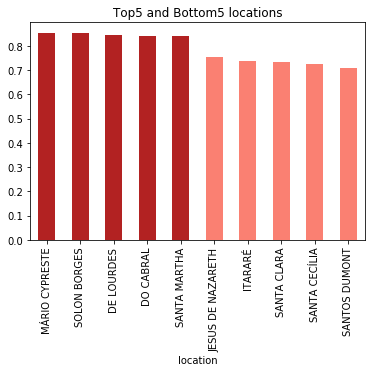

In [31]:
#Filter out locations with too small appointment counts
filtered_tq2 = table_q2[table_q2["count_by_location"]>100]["show_ratio"]

#Show Top 5 locations and Bottom 5 locations.
print(filtered_tq2.sort_values(ascending=False))#.plot(kind="bar")
top5_bot5 = filtered_tq2.sort_values(ascending=False).iloc[:5].append(filtered_tq2.sort_values(ascending=False).iloc[-5:])
top5_bot5.plot(kind="bar", color=["firebrick"]*5 + ["salmon"]*5, title="Top5 and Bottom5 locations")

Now Let's see the correlation between count_by_location and show_rate

In [32]:
table_q2.describe()

,count_by_location,show_ratio
count,81.000000,81.000000
mean,1364.530864,0.794573
std,1369.199539,0.097230
min,1.000000,0.000000
25%,413.000000,0.782546
50%,851.000000,0.802412
75%,2018.000000,0.820093
max,7717.000000,1.000000


In [33]:
table_q2.corr()

,count_by_location,show_ratio
count_by_location,1.000000,0.036262
show_ratio,0.036262,1.000000


There's small positive correlation between Appointment_counts_log2 and show_ratio.
It implies People who make many appointments is little more likely to not show up.

Maybe we can take a deeper look by categorizing people into several groups and visualizing it.

g1 count:5       average show_rate: 0.787
g2 count:8       average show_rate: 0.815
g3 count:15      average show_rate: 0.798
g4 count:19      average show_rate: 0.800
g5 count:21      average show_rate: 0.797
g6 count:6       average show_rate: 0.793


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


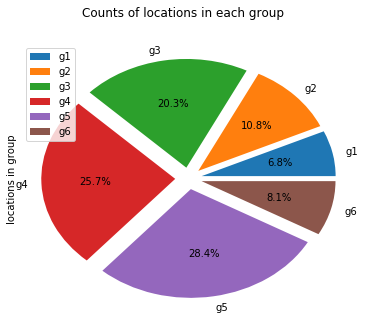

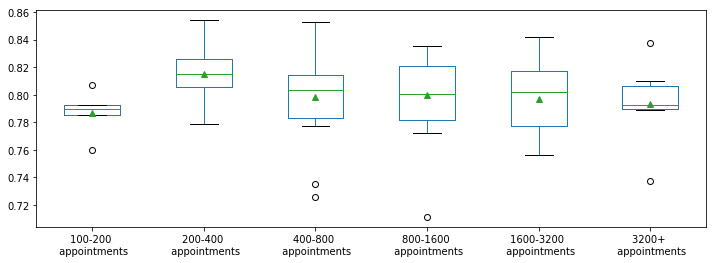

In [34]:
g1 = table_q2[(table_q2["count_by_location"]>=100)&(table_q2["count_by_location"]<200)]["show_ratio"].rename("100-200 \n appointments")
g2 = table_q2[(table_q2["count_by_location"]>=200)&(table_q2["count_by_location"]<400)]["show_ratio"].rename("200-400 \n appointments")
g3 = table_q2[(table_q2["count_by_location"]>=400)&(table_q2["count_by_location"]<800)]["show_ratio"].rename("400-800 \n appointments")
g4 = table_q2[(table_q2["count_by_location"]>=800)&(table_q2["count_by_location"]<1600)]["show_ratio"].rename("800-1600 \n appointments")
g5 = table_q2[(table_q2["count_by_location"]>=1600)&(table_q2["count_by_location"]<3200)]["show_ratio"].rename("1600-3200 \n appointments")
g6 = table_q2[(table_q2["count_by_location"]>=3200)]["show_ratio"].rename("3200+ \n appointments")

groups = [g1,g2,g3,g4,g5,g6]
groups_count = []
for i,g in zip(range(1,7),groups):
    print(f"g{i} count:{len(g): <5}   average show_rate: {g.mean():.3f}")
    groups_count.append(len(g))
pd.DataFrame(groups_count, index = [f"g{i}" for i in range(1,7)], columns=["locations in group"]).plot(explode=(0.1,0.1,0.1,0.1,0.1,0.1),kind="pie", figsize=(6,5), subplots=True, autopct="%0.1f%%", title="Counts of locations in each group")

log2_grouped = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
log2_grouped.plot(kind="box", showmeans=True, figsize=(12,4)) #circles are outliers.

locations with 100-200 appointments recoreded lowest average show_rate followed by locations with more than 3200 appointments. small counts in these two groups should be taken into account. In order to conclude that locations with extremely small or large appointments are more likely to have high 'no-show' rate, more data will be required.

##### If you want "statistic analysis"
using scify and statmodels,
1. proove each group has to **satisfy gausian distribution**
2. proove variance of each group **satisfy equal variance**
3. proove each group is independent(in this case, this condition is satisfied)
4. apply ANOVA and tucky's range test. check p-value.

as this project doesn't require statistic analysis, let's pass it.

### Question3

* Q3. Does "no-show" realted to the time gap between scheduled day and appointment day?

In [35]:
table_q3[-20:]

,time_gaps,Show
110507,0,1
110508,0,1
110509,0,1
110510,0,1
110511,0,1
110512,0,1
110513,0,1
110514,0,1
110515,2,0
110516,1,0


In [36]:
table_q3.describe()

,time_gaps,Show
count,110527.000000,110527.000000
mean,10.183702,0.798067
std,15.254996,0.401444
min,-6.000000,0.000000
25%,0.000000,1.000000
50%,4.000000,1.000000
75%,15.000000,1.000000
max,179.000000,1.000000


In [37]:
table_q3.corr()

,time_gaps,Show
time_gaps,1.000000,-0.186231
Show,-0.186231,1.000000


In [38]:
table_q3#.plot(kind="line")#, x="time_gaps", y="Show")

,time_gaps,Show
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,2,1
6,2,0
7,2,0
8,0,1
9,2,1


There's small(but relatively big compared to previous variables we inspected) positive correlation between time_gaps and Show. It implies that the longer the time gap is, it is more likely to not show up.


### Question4
* Q4. Does physical conditions such as hipertension, diabetes and handicap affects to "no-show"? How much?

In [39]:
table_q4.describe()

,Hipertension,Diabetes,Handicap,Show
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.197246,0.071865,0.022248,0.798067
std,0.397921,0.258265,0.161543,0.401444
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000


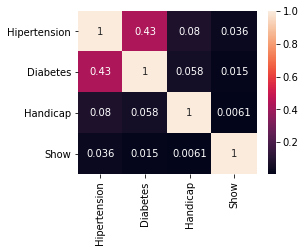

In [40]:
corr = table_q4.corr()
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True)

There's small positive correlation between Hipertension and Show with correlation coefficient 0.036
Diabetes and Handicap scored 0.015 and 0.0061 respectively. 

Although it is not related to the question, moderate correlation between diabetes and Hipertension was detected.

### Question5
* Q5. How much effecient is sending "SMS" to reduce "no-show" ?

In [41]:
count_all = table_q5.groupby(["Show","SMS_received"]).size().to_frame()#.unstack()
count_all

0
Show SMS_received       
0    0             12535
     1              9784
1    0             62510
     1             25698

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fd8361c18>], dtype=object)

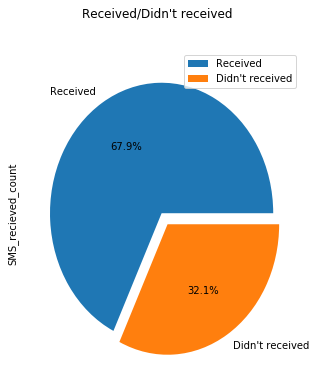

In [42]:
SMS_received_count = table_q5.groupby("SMS_received").count()
SMS_received_count.rename(columns={"Show":"SMS_recieved_count"}).plot(kind="pie", title="Received/Didn't received",subplots=True, figsize=(5,6), explode=(0,0.1), labels=["Received","Didn't received"], autopct="%0.1f%%")

around 68% of patients received SMS while 32% didn't

In [43]:
table_q5.describe()

,SMS_received,Show
count,110527.000000,110527.000000
mean,0.321026,0.798067
std,0.466873,0.401444
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [44]:
table_q5.corr()

,SMS_received,Show
SMS_received,1.000000,-0.126431
Show,-0.126431,1.000000


To my surprise, patients who received SMS were found to show up less than patients who didn't.
The Negative Correlation is not big but it's much more related than that of Physical condition.

One possible hypothesis can be that SMS was sent to the patients that were likely to break the appointment. (e.g. those on the black list. or maybe SMS was not sent to those on the white list.)

## Conclusions.

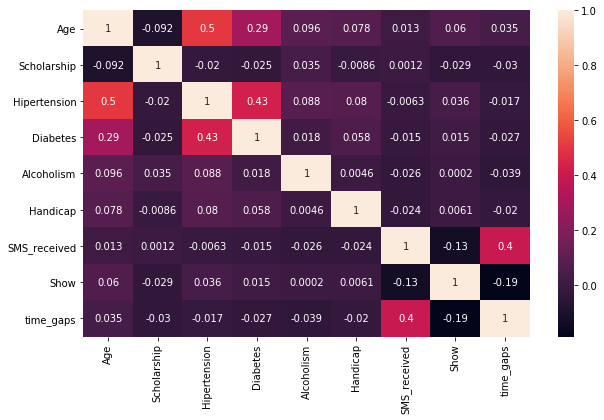

In [45]:
cleaned = table.drop(["PatientID","AppointmentID", "ScheduledDay", "AppointmentDay","Neighbourhood"], axis=1)
corr = cleaned.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

### Summary
I've investigated the medical appointment data collected from brazil.
To answer five questions, we cleaned up and explored the dataset.

Among all independent variables I inspected, `Time gap` was most highly correlated with 'Show' scoring "-0.18" correlation coefficient. Although this score is not enought to call "high" it was relatively higher than other variables such as physical conditions(6~30 fold). `SMS Received` showed opposite result to my expectation. It was negatively correlated("-0.126") to 'show' and plausible reason would be seletive sending of messages.

PatientID and Location(Neighbourhood) were investigated in group.
Patients with more appointment counts were less likely to show up. ("-0.03" with "show rate")
while locations with more appointment counts showed were more likely to show up ("+0.036" with "show rate")

### Limitations
During the investigation, I did not applied statistic analysis such as t-test or ANOVA. Thus it is dangerous to conclude the correlation as "statiscally significant(p-value<0.05)". statistic significance might exists in some cases such as 'Time gap' as the coefficient is not small enough to ignore and number of samples is ample. However, in cases like Q1 and Q2, where I grouped samples. some groups have only a few samples. More data will be required to prove statistic significance.